### In this notebook we explored covid papers dataset. 
For this particular notebook we have explored different alpha values for LDA Model. We are doing text analysis on paper Abstracts & Titles using nltk for text preprocessing, Topic modeling using LDA, Paper similarity analysis using TF-IDF vectors.

In [39]:
# Gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pandas as pd
import numpy as np
np.random.seed(2020)

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/kumaar7/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kumaar7/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [41]:
import numpy as np
data = pd.read_excel('AbstractsCleanUpdated_v1.xlsx');
#data = pd.read_excel('AbstractsCleanUpdated_v1.xlsx', usecols=['Publication Date','Title','Abstract']);
data.head(5)

,ID,DOI,Latest Version,License Type,PMCID,PMID,Pub Year,Publication Date,Publication Types,Published As,...,Total Citations,Total References,ISSN,Journal Country,Journal Issue,Journal Name,Journal Name Full,Journal Pages,Journal Volume,System ID
0,15971,10.1177/2150132720936858,Yes,NaN,NaN,32578477.0,2020,2020-01-01,Journal Article,NaN,...,NaN,NaN,2150-1319,United States,NaN,J Prim Care Community Health,Journal of primary care & community health,2150132720936860,11,32578477
1,22120,10.1093/jtm/taaa008,Yes,NaN,PMC7107534,31943059.0,2020,2020-01-17,Journal Article,NaN,...,46.0,3.0,1195-1982,England,2,J Travel Med,Journal of travel medicine,NaN,27,31943059
2,18664,10.1101/2020.01.19.911669,Yes,It is made available under a CC-BY-NC-ND 4.0 I...,NaN,NaN,2020,2020-01-19,Preprint,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1101/2020.01.19.911669
3,1781,10.2139/ssrn.3523861,Yes,NaN,NaN,NaN,2020,2020-01-21,Preprint,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2139/ssrn.3523861
4,13155,10.1101/2020.01.22.915660,No,NaN,PMC7217099,32511294.0,2020,2020-01-22,Preprint,Now published as: 32094589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1101/2020.01.22.915660


In [42]:
data=data.dropna(axis=0, subset=['Publication Date','Title', 'Abstract',])

In [43]:
from sklearn.utils import shuffle
df = shuffle(data1)
data = df[:10000]

In [44]:
#data =data.sample(n=10000)
data.tail()

,ID,DOI,Latest Version,License Type,PMCID,PMID,Pub Year,Publication Date,Publication Types,Published As,...,Total Citations,Total References,ISSN,Journal Country,Journal Issue,Journal Name,Journal Name Full,Journal Pages,Journal Volume,System ID
25719,94005,10.1101/2020.07.05.20146977,Yes,It is made available under a CC-BY-NC-ND 4.0 I...,NaN,NaN,2020,2020-07-08,Preprint,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1101/2020.07.05.20146977
51709,124120,10.1016/j.cmi.2020.09.047,Yes,NaN,PMC7524443,33007473.0,2020,2020-10-03,Letter,NaN,...,0.0,5.0,1198-743X,England,NaN,Clin Microbiol Infect,Clinical microbiology and infection : the offi...,NaN,NaN,33007473
58689,132118,10.21203/rs.3.rs-96813/v1,Yes,CC BY 4.0,NaN,NaN,2020,2020-10-28,Preprint,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs-96813
1898,19058,10.26434/chemrxiv.12021330.v1,Yes,NaN,NaN,NaN,2020,2020-03-24,Preprint,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.26434/chemrxiv.12021330
62163,136302,10.1038/s41598-020-76282-0,Yes,NaN,NaN,33154542.0,2020,2020-11-07,Journal Article,NaN,...,NaN,NaN,2045-2322,England,1,Sci Rep,Scientific reports,19196,10,33154542


## Test Pre-Processing
### Includes Stopword Removal(we also have extended list of stopwords), Tokenization, Building Biagrams and Triagrams, Lamatization etc.

In [45]:
with open('StopWordsList.txt', 'r') as s:
    sw = s.readlines()
    stopwords_data = list(map(lambda x: x.replace('\n',''), sw))
    stopwords_data[0] = '$ 0.002'
    
    
# NLTK Stop words
stop_words = stopwords.words('english')

#extending stopwords with some custom stopwords
stop_words.extend(stopwords_data)

In [46]:
data = data.Abstract.values.tolist()

In [47]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['media', 'plays', 'an', 'indispensable', 'role', 'in', 'society', 'to', 'influence', 'health', 'literacy', 'to', 'document', 'covid', 'coverage', 'in', 'kannada', 'daily', 'newspapers', 'hardcopies', 'of', 'editions', 'were', 'methodically', 'reviewed', 'content', 'analysis', 'and', 'data', 'coding', 'of', 'of', 'the', 'possible', 'terms', 'concepts', 'related', 'to', 'covid', 'epidemiology', 'was', 'undertaken', 'across', 'dailies', 'five', 'different', 'dimensions', 'in', 'reporting', 'documented', 'reporting', 'of', 'statistics', 'both', 'numbers', 'and', 'manner', 'of', 'reporting', 'reporting', 'of', 'epidemiological', 'concepts', 'terms', 'frequency', 'of', 'use', 'and', 'frequency', 'of', 'reporting', 'focus', 'of', 'reporting', 'density', 'of', 'reporting', 'and', 'finally', 'what', 'is', 'not', 'reported', 'which', 'could', 'have', 'been', 'reported', 'desirable', 'reporting', 'numbers', 'were', 'reported', 'as', 'headlines', 'gt', 'of', 'listed', 'items', 'were', 'covered',

In [48]:

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# To get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Print trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['media', 'plays', 'an', 'indispensable', 'role', 'in', 'society', 'to', 'influence', 'health', 'literacy', 'to', 'document', 'covid', 'coverage', 'in', 'kannada', 'daily', 'newspapers', 'hardcopies', 'of', 'editions', 'were', 'methodically', 'reviewed', 'content', 'analysis', 'and', 'data', 'coding', 'of', 'of', 'the', 'possible', 'terms', 'concepts', 'related', 'to', 'covid', 'epidemiology', 'was', 'undertaken', 'across', 'dailies', 'five', 'different', 'dimensions', 'in', 'reporting', 'documented', 'reporting', 'of', 'statistics', 'both', 'numbers', 'and', 'manner', 'of', 'reporting', 'reporting', 'of', 'epidemiological', 'concepts', 'terms', 'frequency', 'of', 'use', 'and', 'frequency', 'of', 'reporting', 'focus', 'of', 'reporting', 'density', 'of', 'reporting', 'and', 'finally', 'what', 'is', 'not', 'reported', 'which', 'could', 'have', 'been', 'reported', 'desirable', 'reporting', 'numbers', 'were', 'reported', 'as', 'headlines', 'gt', 'of', 'listed', 'items', 'were', 'covered', 

In [49]:

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [50]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['medium', 'play', 'indispensable', 'role', 'society', 'influence', 'literacy', 'document', 'newspaper', 'hardcopie', 'edition', 'methodically', 'review', 'content', 'analysis', 'datum', 'code', 'possible', 'term', 'concept', 'relate', 'covid', 'epidemiology', 'undertake', 'daily', 'different', 'dimension', 'report', 'document', 'reporting', 'statistic', 'manner', 'report', 'report', 'epidemiological', 'concept', 'term', 'frequency', 'frequency', 'report', 'focus', 'reporting', 'density', 'reporting', 'finally', 'report', 'report', 'desirable', 'reporting', 'report', 'headline', 'list', 'item', 'cover', 'term', 'cover', 'help', 'look', 'news', 'epidemiological', 'information', 'identify', 'gap', 'report', 'conclude', 'medium', 'do', 'commendable', 'job', 'medium', 'communication', 'plan', 'urgently']]


### Creating Dictionary ,Corpus and TF

In [51]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 8), (46, 4), (47, 1), (48, 1), (49, 1), (50, 1), (51, 3), (52, 1), (53, 1)]]


In [52]:
# Term-frequency
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('analysis', 1),
  ('code', 1),
  ('commendable', 1),
  ('communication', 1),
  ('concept', 2),
  ('conclude', 1),
  ('content', 1),
  ('cover', 2),
  ('covid', 1),
  ('daily', 1),
  ('datum', 1),
  ('density', 1),
  ('desirable', 1),
  ('different', 1),
  ('dimension', 1),
  ('do', 1),
  ('document', 2),
  ('edition', 1),
  ('epidemiological', 2),
  ('epidemiology', 1),
  ('finally', 1),
  ('focus', 1),
  ('frequency', 2),
  ('gap', 1),
  ('hardcopie', 1),
  ('headline', 1),
  ('help', 1),
  ('identify', 1),
  ('indispensable', 1),
  ('influence', 1),
  ('information', 1),
  ('item', 1),
  ('job', 1),
  ('list', 1),
  ('literacy', 1),
  ('look', 1),
  ('manner', 1),
  ('medium', 3),
  ('methodically', 1),
  ('news', 1),
  ('newspaper', 1),
  ('plan', 1),
  ('play', 1),
  ('possible', 1),
  ('relate', 1),
  ('report', 8),
  ('reporting', 4),
  ('review', 1),
  ('role', 1),
  ('society', 1),
  ('statistic', 1),
  ('term', 3),
  ('undertake', 1),
  ('urgently', 1)]]

### LDA Base Model with basic Settings

In [56]:
# Building LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=11, 
                                            random_state=100,
                                            chunksize=100,
                                            passes=10)

In [57]:
# Print the Keyword in the 11 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.034*"care" + 0.034*"patient" + 0.014*"hospital" + 0.013*"medical" + '
  '0.010*"risk" + 0.010*"staff" + 0.009*"pandemic" + 0.009*"surgical" + '
  '0.009*"service" + 0.008*"procedure"'),
 (1,
  '0.016*"health" + 0.014*"mental" + 0.013*"anxiety" + 0.013*"report" + '
  '0.012*"participant" + 0.011*"high" + 0.011*"increase" + 0.010*"survey" + '
  '0.010*"people" + 0.010*"child"'),
 (2,
  '0.029*"virus" + 0.027*"cell" + 0.020*"viral" + 0.016*"human" + '
  '0.015*"protein" + 0.013*"drug" + 0.012*"response" + 0.011*"infection" + '
  '0.011*"immune" + 0.010*"vaccine"'),
 (3,
  '0.038*"patient" + 0.027*"test" + 0.024*"symptom" + 0.022*"case" + '
  '0.013*"infection" + 0.013*"sample" + 0.012*"report" + 0.012*"clinical" + '
  '0.010*"coronavirus" + 0.009*"respiratory"'),
 (4,
  '0.030*"patient" + 0.029*"treatment" + 0.018*"disease" + 0.016*"clinical" + '
  '0.015*"covid" + 0.012*"infection" + 0.011*"severe" + 0.011*"trial" + '
  '0.011*"report" + 0.010*"acute"'),
 (5,
  '0.018*"author" 

In [58]:
lda_model.show_topics(num_topics=11, num_words=50, log=False, formatted=True)

[(0,
  '0.034*"care" + 0.034*"patient" + 0.014*"hospital" + 0.013*"medical" + 0.010*"risk" + 0.010*"staff" + 0.009*"pandemic" + 0.009*"surgical" + 0.009*"service" + 0.008*"procedure" + 0.008*"surgery" + 0.007*"practice" + 0.007*"management" + 0.006*"system" + 0.006*"time" + 0.006*"mask" + 0.006*"team" + 0.006*"perform" + 0.006*"unit" + 0.005*"resource" + 0.005*"high" + 0.005*"covid" + 0.005*"place" + 0.005*"home" + 0.005*"healthcare" + 0.005*"reduce" + 0.004*"guideline" + 0.004*"critical" + 0.004*"face" + 0.004*"center" + 0.004*"delivery" + 0.004*"worker" + 0.004*"equipment" + 0.004*"physical" + 0.004*"support" + 0.004*"work" + 0.004*"set" + 0.004*"exposure" + 0.004*"professional" + 0.004*"change" + 0.004*"training" + 0.004*"physician" + 0.004*"continue" + 0.004*"room" + 0.003*"follow" + 0.003*"protocol" + 0.003*"area" + 0.003*"person" + 0.003*"visit" + 0.003*"experience"'),
 (1,
  '0.016*"health" + 0.014*"mental" + 0.013*"anxiety" + 0.013*"report" + 0.012*"participant" + 0.011*"high" 

In [59]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.340356603949568

Coherence Score:  0.48919164637195894


## Experiments with different alpha values including auto, symmetric, asymmetric [0.01]*num_topics etc.

In [72]:
num_topics=11
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics, 
                                            random_state=100,
                                            chunksize=100,
                                             passes=10,
                                            alpha='auto',
                                            eta=[0.01]*len(id2word.keys()))

In [73]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda1 = CoherenceModel(model=lda_model2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('\nCoherence Score: ', coherence_lda1)


Perplexity:  -27.811085674564225

Coherence Score:  0.5241772865713433


In [74]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model2, corpus, id2word)
vis

/Users/kumaar7/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.112186 -0.111029       1        1  15.557730
0      0.107877  0.024550       2        1  13.646796
9      0.021450 -0.168829       3        1  13.435407
6      0.099707  0.001981       4        1  13.180097
10     0.160287  0.153350       5        1  11.553235
3      0.120394 -0.013340       6        1  10.619407
2     -0.109862 -0.231027       7        1   6.356458
5     -0.100948  0.072330       8        1   6.109387
1      0.164569  0.102870       9        1   4.443410
7     -0.278670  0.299267      10        1   2.611521
8     -0.296991 -0.130125      11        1   2.486553, topic_info=     Category          Freq          Term         Total  loglift  logprob
term                                                                     
111   Default  34391.000000       patient  34391.000000  30.0000  30.0000
929   Default   6502.000000          test   6502.000000  29.0000  29.0000
98    Default  12261.000000          case  12261.000000  28.0000  28.0000
169   Default   8525.000000        health   8525.000000  27.0000  27.0000
363   Default   6641.000000          care   6641.000000  26.0000  26.0000
203   Default   6332.000000     treatment   6332.000000  25.0000  25.0000
185   Default   8548.000000      pandemic   8548.000000  24.0000  24.0000
158   Default   3278.000000          drug   3278.000000  23.0000  23.0000
245   Default   6119.000000         model   6119.000000  22.0000  22.0000
216   Default   4074.000000          cell   4074.000000  21.0000  21.0000
582   Default   6812.000000         virus   6812.000000  20.0000  20.0000
823   Default   5369.000000       symptom   5369.000000  19.0000  19.0000
141   Default   2283.000000       testing   2283.000000  18.0000  18.0000
521   Default   5840.000000          rate   5840.000000  17.0000  17.0000
55    Default   4290.000000           age   4290.000000  16.0000  16.0000
124   Default  10044.000000     infection  10044.000000  15.0000  15.0000
835   Default   8092.000000      clinical   8092.000000  14.0000  14.0000
284   Default   9420.000000          high   9420.000000  13.0000  13.0000
319   Default   3930.000000         viral   3930.000000  12.0000  12.0000
45    Default   7773.000000        report   7773.000000  11.0000  11.0000
707   Default   8216.000000          risk   8216.000000  10.0000  10.0000
289   Default   3965.000000     mortality   3965.000000   9.0000   9.0000
1205  Default   4562.000000         group   4562.000000   8.0000   8.0000
10    Default   5154.000000         datum   5154.000000   7.0000   7.0000
654   Default   3262.000000        method   3262.000000   6.0000   6.0000
27    Default   3963.000000      identify   3963.000000   5.0000   5.0000
105   Default   4764.000000      hospital   4764.000000   4.0000   4.0000
139   Default   7601.000000        severe   7601.000000   3.0000   3.0000
187   Default   2024.000000       protein   2024.000000   2.0000   2.0000
792   Default   1946.000000        target   1946.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
213   Topic11     24.123665       binding     24.248913   3.6891  -7.1675
556   Topic11    445.426239    structural    516.940674   3.5454  -4.2517
998   Topic11    161.556091        combat    206.185593   3.4503  -5.2659
158   Topic11   2550.496826          drug   3278.964844   3.4430  -2.5067
926   Topic11    661.471924     structure    957.137817   3.3248  -3.8563
792   Topic11   1341.668091        target   1946.735474   3.3220  -3.1491
2692  Topic11    177.800171         label    259.637146   3.3156  -5.1701
2252  Topic11    107.987251      discover    167.042953   3.2580  -5.6687
2685  Topic11    219.325439  experimental    354.194519   3.2150  -4.9602
187   Topic11   1241.395630       protein   2024.784180   3.2050  -3.2267
148   Topic11    617.388367          bind   1090.444336   3.1254  -3.9252

In [99]:
lda_model2.show_topics(num_topics=11, num_words=50, log=False, formatted=True)

[(0,
  '0.039*"care" + 0.028*"patient" + 0.016*"medical" + 0.015*"hospital" + 0.013*"risk" + 0.011*"service" + 0.011*"staff" + 0.010*"practice" + 0.010*"surgical" + 0.009*"pandemic" + 0.009*"procedure" + 0.009*"surgery" + 0.008*"time" + 0.007*"resource" + 0.007*"management" + 0.007*"work" + 0.007*"mask" + 0.006*"team" + 0.006*"healthcare" + 0.006*"home" + 0.006*"place" + 0.006*"unit" + 0.006*"system" + 0.006*"reduce" + 0.006*"high" + 0.006*"change" + 0.006*"face" + 0.006*"support" + 0.006*"perform" + 0.005*"center" + 0.005*"guideline" + 0.005*"exposure" + 0.005*"access" + 0.005*"worker" + 0.005*"delivery" + 0.005*"critical" + 0.005*"experience" + 0.005*"activity" + 0.005*"physical" + 0.005*"equipment" + 0.004*"continue" + 0.004*"physician" + 0.004*"set" + 0.004*"maintain" + 0.004*"professional" + 0.004*"area" + 0.004*"visit" + 0.004*"follow" + 0.004*"protocol" + 0.004*"plan"'),
 (1,
  '0.028*"mental" + 0.025*"health" + 0.025*"anxiety" + 0.023*"participant" + 0.020*"survey" + 0.019*"rep

In [76]:
num_topics=11
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics, 
                                            random_state=100,
                                            chunksize=100,
                                             passes=10,
                                            alpha='asymmetric',
                                            eta=[0.01]*len(id2word.keys()))

In [77]:
# Compute Perplexity
print('\nPerplexity: ', lda_model3.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda3 = CoherenceModel(model=lda_model3, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda3 = coherence_model_lda3.get_coherence()
print('\nCoherence Score: ', coherence_lda3)


Perplexity:  -27.84688780123838

Coherence Score:  0.5058386193286353


In [98]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model3, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.100365 -0.053962       1        1  19.329807
4     -0.159915  0.074187       2        1  14.335817
3     -0.102768  0.163187       3        1  11.455132
6     -0.072209 -0.012102       4        1  10.187995
10    -0.060697  0.214341       5        1   9.814256
2     -0.079331 -0.067360       6        1   9.716493
9     -0.080593 -0.235606       7        1   9.517944
1     -0.106476  0.028834       8        1   7.385026
5      0.152961 -0.159075       9        1   3.946492
8      0.243953 -0.173233      10        1   2.348716
7      0.365440  0.220789      11        1   1.962324, topic_info=     Category          Freq           Term         Total  loglift  logprob
term                                                                      
111   Default  34453.000000        patient  34453.000000  30.0000  30.0000
929   Default   6390.000000           test   6390.000000  29.0000  29.0000
98    Default  12194.000000           case  12194.000000  28.0000  28.0000
169   Default   8481.000000         health   8481.000000  27.0000  27.0000
245   Default   6182.000000          model   6182.000000  26.0000  26.0000
363   Default   6879.000000           care   6879.000000  25.0000  25.0000
158   Default   3323.000000           drug   3323.000000  24.0000  24.0000
203   Default   6283.000000      treatment   6283.000000  23.0000  23.0000
823   Default   5396.000000        symptom   5396.000000  22.0000  22.0000
216   Default   4126.000000           cell   4126.000000  21.0000  21.0000
582   Default   6801.000000          virus   6801.000000  20.0000  20.0000
185   Default   8453.000000       pandemic   8453.000000  19.0000  19.0000
55    Default   4305.000000            age   4305.000000  18.0000  18.0000
654   Default   3235.000000         method   3235.000000  17.0000  17.0000
835   Default   8059.000000       clinical   8059.000000  16.0000  16.0000
284   Default   9463.000000           high   9463.000000  15.0000  15.0000
27    Default   3991.000000       identify   3991.000000  14.0000  14.0000
124   Default  10074.000000      infection  10074.000000  13.0000  13.0000
707   Default   8246.000000           risk   8246.000000  12.0000  12.0000
154   Default   3948.000000        country   3948.000000  11.0000  11.0000
187   Default   2063.000000        protein   2063.000000  10.0000  10.0000
10    Default   5146.000000          datum   5146.000000   9.0000   9.0000
521   Default   5833.000000           rate   5833.000000   8.0000   8.0000
0     Default   3688.000000       analysis   3688.000000   7.0000   7.0000
319   Default   3981.000000          viral   3981.000000   6.0000   6.0000
792   Default   1987.000000         target   1987.000000   5.0000   5.0000
289   Default   3922.000000      mortality   3922.000000   4.0000   4.0000
1004  Default   1548.000000      detection   1548.000000   3.0000   3.0000
139   Default   7609.000000         severe   7609.000000   2.0000   2.0000
45    Default   7812.000000         report   7812.000000   1.0000   1.0000
...       ...           ...            ...           ...      ...      ...
117   Topic11     87.594109          thank     87.719398   3.9296  -5.6413
94    Topic11     80.374649       actively     80.499939   3.9295  -5.7273
2212  Topic11     74.975304        igm_igg     75.100594   3.9294  -5.7968
668   Topic11     56.996681  unpredictable     57.121967   3.9288  -6.0710
2223  Topic11     55.881863         vector     56.007149   3.9288  -6.0907
2380  Topic11     48.359913   policy_maker     48.485199   3.9285  -6.2353
1024  Topic11     46.303268         rating     46.428555   3.9283  -6.2788
2213  Topic11     37.735703      mammalian     37.860989   3.9277  -6.4834
918   Topic11   1072.395752    sensitivity   1186.119629   3.8302  -3.1363
896   Topic11   1114.278809     diagnostic   1288.782471   3.7856  -3.0980
929   Topic11   3828.896973   

In [80]:
num_topics=11
lda_model4 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics, 
                                            random_state=100,
                                            chunksize=100,
                                             passes=10,
                                            alpha=[0.01]*num_topics,
                                            eta=[0.01]*len(id2word.keys()))

In [81]:
# Compute Perplexity
print('\nPerplexity: ', lda_model4.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda4 = CoherenceModel(model=lda_model4, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda4 = coherence_model_lda4.get_coherence()
print('\nCoherence Score: ', coherence_lda4)


Perplexity:  -27.904625275994466

Coherence Score:  0.5024792750254706


In [100]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model4, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.123843  0.021920       1        1  15.801197
0      0.117836  0.023076       2        1  14.566185
3      0.074969 -0.081039       3        1  12.163918
9      0.068829  0.162906       4        1  11.404875
6      0.085700 -0.021941       5        1  11.262923
10     0.104095 -0.193330       6        1  10.933458
2     -0.060043  0.171763       7        1   7.205819
5     -0.019932  0.073628       8        1   5.696524
1      0.131441 -0.117450       9        1   5.660069
8     -0.258745  0.220646      10        1   2.983255
7     -0.367992 -0.260179      11        1   2.321776, topic_info=     Category          Freq            Term         Total  loglift  logprob
term                                                                       
111   Default  34308.000000         patient  34308.000000  30.0000  30.0000
929   Default   6388.000000            test   6388.000000  29.0000  29.0000
98    Default  12342.000000            case  12342.000000  28.0000  28.0000
245   Default   6412.000000           model   6412.000000  27.0000  27.0000
169   Default   8542.000000          health   8542.000000  26.0000  26.0000
363   Default   6634.000000            care   6634.000000  25.0000  25.0000
158   Default   3329.000000            drug   3329.000000  24.0000  24.0000
216   Default   4149.000000            cell   4149.000000  23.0000  23.0000
203   Default   6340.000000       treatment   6340.000000  22.0000  22.0000
582   Default   6849.000000           virus   6849.000000  21.0000  21.0000
823   Default   5324.000000         symptom   5324.000000  20.0000  20.0000
124   Default  10095.000000       infection  10095.000000  19.0000  19.0000
185   Default   8497.000000        pandemic   8497.000000  18.0000  18.0000
55    Default   4319.000000             age   4319.000000  17.0000  17.0000
284   Default   9454.000000            high   9454.000000  16.0000  16.0000
141   Default   2219.000000         testing   2219.000000  15.0000  15.0000
319   Default   3971.000000           viral   3971.000000  14.0000  14.0000
654   Default   3240.000000          method   3240.000000  13.0000  13.0000
521   Default   5887.000000            rate   5887.000000  12.0000  12.0000
10    Default   5141.000000           datum   5141.000000  11.0000  11.0000
1661  Default   2374.000000           child   2374.000000  10.0000  10.0000
835   Default   8050.000000        clinical   8050.000000   9.0000   9.0000
45    Default   7803.000000          report   7803.000000   8.0000   8.0000
154   Default   4088.000000         country   4088.000000   7.0000   7.0000
139   Default   7615.000000          severe   7615.000000   6.0000   6.0000
105   Default   4759.000000        hospital   4759.000000   5.0000   5.0000
289   Default   3956.000000       mortality   3956.000000   4.0000   4.0000
1004  Default   1553.000000       detection   1553.000000   3.0000   3.0000
187   Default   2064.000000         protein   2064.000000   2.0000   2.0000
792   Default   1979.000000          target   1979.000000   1.0000   1.0000
...       ...           ...             ...           ...      ...      ...
1362  Topic11    105.809547      confidence    105.934311   3.7617  -5.6205
995   Topic11    100.465431          agency    100.590195   3.7616  -5.6724
2405  Topic11     93.364769       volunteer     93.489532   3.7615  -5.7457
1718  Topic11     91.555161  false_negative     91.679924   3.7615  -5.7652
1971  Topic11     90.067795       vaccinate     90.192558   3.7615  -5.7816
117   Topic11     87.815979           thank     87.940742   3.7614  -5.8069
94    Topic11     80.667038        actively     80.791801   3.7613  -5.8919
141   Topic11   1806.089844         testing   2219.274658   3.5568  -2.7833
918   Topic11    931.393311     sensitivity   1188.754761   3.5189  -3.4455
896   Topic11    936.311951      diagnostic   1295.213257   3.4

## Finding the optimal number of topics

In [83]:
def compute_LDA_coherence(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=num_topics, 
                                                    random_state=100,
                                                    chunksize=100,
                                                    passes=10,
                                                   alpha='auto',
                                            eta=[0.01]*len(id2word.keys()))
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [84]:
LDA_model_list, LDA_coherence_values = compute_LDA_coherence(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=8, limit=39)

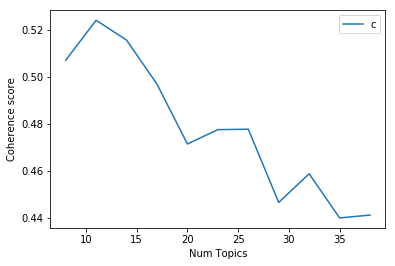

Num Topics = 8  has Coherence Value of 0.5071
Num Topics = 11  has Coherence Value of 0.5242
Num Topics = 14  has Coherence Value of 0.5157
Num Topics = 17  has Coherence Value of 0.497
Num Topics = 20  has Coherence Value of 0.4715
Num Topics = 23  has Coherence Value of 0.4776
Num Topics = 26  has Coherence Value of 0.4778
Num Topics = 29  has Coherence Value of 0.4466
Num Topics = 32  has Coherence Value of 0.4588
Num Topics = 35  has Coherence Value of 0.44
Num Topics = 38  has Coherence Value of 0.4412


In [85]:
# Show graph
limit=39; start=8; step=3;
x = range(start, limit, step)
plt.plot(x, LDA_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, LDA_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [87]:
# Select the model with 14 topics and print the topics with 50 words
lda_optimal_model = LDA_model_list[1]
lda_model_topics = lda_optimal_model.show_topics(formatted=False)
pprint(lda_optimal_model.print_topics(num_words=50))

[(0,
  '0.039*"care" + 0.028*"patient" + 0.016*"medical" + 0.015*"hospital" + '
  '0.013*"risk" + 0.011*"service" + 0.011*"staff" + 0.010*"practice" + '
  '0.010*"surgical" + 0.009*"pandemic" + 0.009*"procedure" + 0.009*"surgery" + '
  '0.008*"time" + 0.007*"resource" + 0.007*"management" + 0.007*"work" + '
  '0.007*"mask" + 0.006*"team" + 0.006*"healthcare" + 0.006*"home" + '
  '0.006*"place" + 0.006*"unit" + 0.006*"system" + 0.006*"reduce" + '
  '0.006*"high" + 0.006*"change" + 0.006*"face" + 0.006*"support" + '
  '0.006*"perform" + 0.005*"center" + 0.005*"guideline" + 0.005*"exposure" + '
  '0.005*"access" + 0.005*"worker" + 0.005*"delivery" + 0.005*"critical" + '
  '0.005*"experience" + 0.005*"activity" + 0.005*"physical" + '
  '0.005*"equipment" + 0.004*"continue" + 0.004*"physician" + 0.004*"set" + '
  '0.004*"maintain" + 0.004*"professional" + 0.004*"area" + 0.004*"visit" + '
  '0.004*"follow" + 0.004*"protocol" + 0.004*"plan"'),
 (1,
  '0.028*"mental" + 0.025*"health" + 0.025*"

In [88]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.112186 -0.111029       1        1  15.558057
0      0.107877  0.024550       2        1  13.646667
9      0.021450 -0.168829       3        1  13.435459
6      0.099707  0.001981       4        1  13.179951
10     0.160287  0.153350       5        1  11.553209
3      0.120394 -0.013340       6        1  10.619663
2     -0.109862 -0.231027       7        1   6.355794
5     -0.100948  0.072330       8        1   6.109395
1      0.164569  0.102870       9        1   4.443805
7     -0.278670  0.299267      10        1   2.611987
8     -0.296991 -0.130125      11        1   2.486006, topic_info=     Category          Freq          Term         Total  loglift  logprob
term                                                                     
111   Default  34391.000000       patient  34391.000000  30.0000  30.0000
929   Default   6503.000000          test   6503.000000  29.0000  29.0000
98    Default  12261.000000          case  12261.000000  28.0000  28.0000
169   Default   8525.000000        health   8525.000000  27.0000  27.0000
363   Default   6641.000000          care   6641.000000  26.0000  26.0000
203   Default   6332.000000     treatment   6332.000000  25.0000  25.0000
185   Default   8549.000000      pandemic   8549.000000  24.0000  24.0000
158   Default   3278.000000          drug   3278.000000  23.0000  23.0000
245   Default   6119.000000         model   6119.000000  22.0000  22.0000
216   Default   4074.000000          cell   4074.000000  21.0000  21.0000
582   Default   6812.000000         virus   6812.000000  20.0000  20.0000
823   Default   5370.000000       symptom   5370.000000  19.0000  19.0000
141   Default   2283.000000       testing   2283.000000  18.0000  18.0000
521   Default   5840.000000          rate   5840.000000  17.0000  17.0000
55    Default   4290.000000           age   4290.000000  16.0000  16.0000
124   Default  10043.000000     infection  10043.000000  15.0000  15.0000
835   Default   8092.000000      clinical   8092.000000  14.0000  14.0000
284   Default   9420.000000          high   9420.000000  13.0000  13.0000
319   Default   3930.000000         viral   3930.000000  12.0000  12.0000
45    Default   7773.000000        report   7773.000000  11.0000  11.0000
707   Default   8216.000000          risk   8216.000000  10.0000  10.0000
289   Default   3965.000000     mortality   3965.000000   9.0000   9.0000
1205  Default   4562.000000         group   4562.000000   8.0000   8.0000
10    Default   5154.000000         datum   5154.000000   7.0000   7.0000
654   Default   3262.000000        method   3262.000000   6.0000   6.0000
27    Default   3962.000000      identify   3962.000000   5.0000   5.0000
105   Default   4764.000000      hospital   4764.000000   4.0000   4.0000
139   Default   7601.000000        severe   7601.000000   3.0000   3.0000
187   Default   2024.000000       protein   2024.000000   2.0000   2.0000
792   Default   1946.000000        target   1946.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
213   Topic11     24.118380       binding     24.243631   3.6893  -7.1675
556   Topic11    445.328644    structural    516.843445   3.5456  -4.2517
998   Topic11    161.520706        combat    206.158203   3.4505  -5.2659
158   Topic11   2549.937988          drug   3278.421875   3.4432  -2.5067
926   Topic11    661.326965     structure    956.994019   3.3249  -3.8563
792   Topic11   1341.374146        target   1946.420410   3.3222  -3.1491
2692  Topic11    177.761215         label    259.599976   3.3158  -5.1701
2252  Topic11    107.963585      discover    167.020569   3.2582  -5.6687
2685  Topic11    219.277390  experimental    354.149414   3.2151  -4.9602
187   Topic11   1241.123657       protein   2024.431152   3.2052  -3.2267
148   Topic11    617.253113          bind   1090.260132   3.1256  -3.9252

In [90]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.5001,"health, pandemic, covid, system, public, peopl...",Media plays an indispensable role in society t...
1,1,1.0,0.5603,"mental, health, anxiety, participant, survey, ...","The spread of COVID-19 throughout Italy, parti..."
2,2,10.0,0.2407,"patient, high, age, group, mortality, risk, co...",We appreciated the response to our letter from...
3,3,3.0,0.5707,"patient, symptom, case, sample, report, infect...","In early 2020, Japan repatriated 566 nationals..."
4,4,4.0,0.3948,"patient, treatment, clinical, disease, covid, ...","Recently, a new and fatal strain of coronaviru..."
5,5,2.0,0.4853,"cell, virus, viral, human, immune, response, i...","Of the single-celled eukaryotic microbes, Naeg..."
6,6,6.0,0.2919,"case, model, rate, infection, transmission, me...",The WHO has announced the novel coronavirus di...
7,7,3.0,0.3710,"patient, symptom, case, sample, report, infect...",IntroductionSevere acute respiratory syndrome ...
8,8,1.0,0.3515,"mental, health, anxiety, participant, survey, ...",Immediate after the official declaration of CO...
9,9,4.0,0.4871,"patient, treatment, clinical, disease, covid, ...",This article has been withdrawn at the request...


### # Creating Wordcloud of Top 50 words in each topic

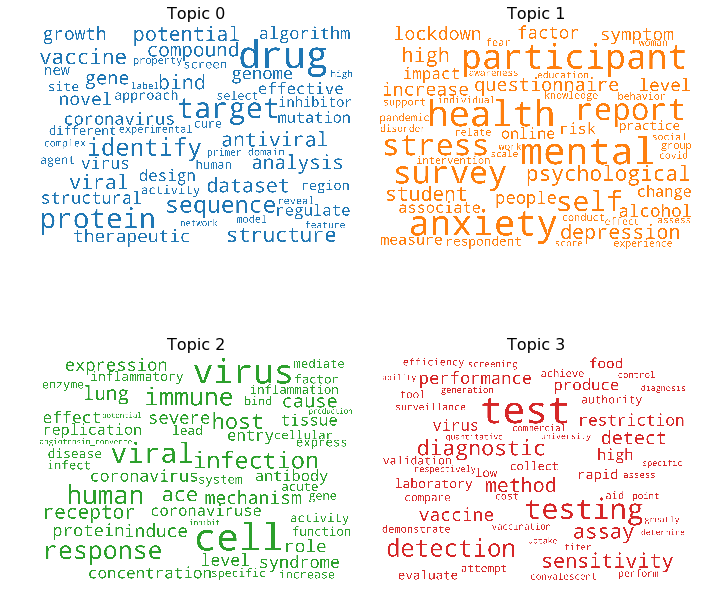

In [91]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_optimal_model.show_topics(num_words=50,formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


### Most representative document for each topic

In [97]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([sent_topics_sorteddf_lda, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.7013,"care, patient, medical, hospital, risk, servic...",Teledermatology has had an explosive impact on...
1,1.0,0.7250,"mental, health, anxiety, participant, survey, ...",Nationwide lockdown to tackle the COVID-19 out...
2,2.0,0.7757,"cell, virus, viral, human, immune, response, i...",Antiviral strategies to inhibit Severe Acute R...
3,3.0,0.8009,"patient, symptom, case, sample, report, infect...",To characterize and interpret the CT imaging s...
4,4.0,0.8102,"patient, treatment, clinical, disease, covid, ...",The global COVID-19 pandemic has led to a race...


## Building LDA Mallet Model

In [ ]:
#!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
    

In [ ]:
#!unzip ./mallet-2.0.8.zip

In [37]:
import os
os.environ.update({'MALLET_HOME': './mallet-2.0.8'})
mallet_path = './mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, id2word=id2word)

In [38]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('datum', 0.022142167643575787),
   ('model', 0.018071989411565674),
   ('covid', 0.01504672246161195),
   ('approach', 0.01267825688895081),
   ('information', 0.01177266711116861),
   ('method', 0.01173286096709027),
   ('propose', 0.010956641157562669),
   ('system', 0.008836963985391145),
   ('tool', 0.008528466368784023),
   ('global', 0.00805079263984396)]),
 (1,
  [('cell', 0.03132667281684888),
   ('virus', 0.02903998272714782),
   ('viral', 0.020364300155063103),
   ('human', 0.01828370659705184),
   ('protein', 0.01732192278249946),
   ('response', 0.015712407011207727),
   ('vaccine', 0.015241329224488193),
   ('target', 0.014544526664965552),
   ('infection', 0.012208765972481207),
   ('drug', 0.01140400808683534)]),
 (4,
  [('care', 0.0400592091351237),
   ('pandemic', 0.03360541340663988),
   ('covid', 0.01927680270670332),
   ('medical', 0.017686614506238107),
   ('health', 0.013144427997462465),
   ('hospital', 0.011689574962994291),
   ('service', 0.01110594205

In [39]:
def compute_mallet_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [40]:
mallet_model_list, mallet_coherence_values = compute_mallet_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=8, limit=39)

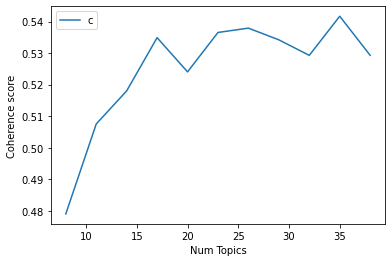

Num Topics = 8  has Coherence Value of 0.479
Num Topics = 11  has Coherence Value of 0.5075
Num Topics = 14  has Coherence Value of 0.518
Num Topics = 17  has Coherence Value of 0.5349
Num Topics = 20  has Coherence Value of 0.5241
Num Topics = 23  has Coherence Value of 0.5366
Num Topics = 26  has Coherence Value of 0.5379
Num Topics = 29  has Coherence Value of 0.5342
Num Topics = 32  has Coherence Value of 0.5293
Num Topics = 35  has Coherence Value of 0.5417
Num Topics = 38  has Coherence Value of 0.5293


In [42]:
# Show graph
limit=39; start=8; step=3;
x = range(start, limit, step)
plt.plot(x, mallet_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, mallet_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

### The Max Coherence value is for 35 number of topics but to compare with the base model let's select number of topics=11

In [43]:
# Select the model with 11 topics and print the topics with 50 words
mallet_optimal_model = mallet_model_list[1]
mallet_model_topics = mallet_optimal_model.show_topics(formatted=False)
pprint(mallet_optimal_model.print_topics(num_words=50))

[(0,
  '0.035*"cell" + 0.033*"infection" + 0.021*"response" + 0.018*"severe" + '
  '0.016*"respiratory" + 0.015*"disease" + 0.015*"immune" + 0.014*"acute" + '
  '0.011*"increase" + 0.011*"viral" + 0.010*"level" + 0.010*"role" + '
  '0.010*"inflammatory" + 0.008*"type" + 0.008*"induce" + 0.008*"effect" + '
  '0.008*"mechanism" + 0.008*"specific" + 0.007*"system" + 0.007*"antibody" + '
  '0.007*"expression" + 0.007*"lung" + 0.006*"function" + 0.006*"inflammation" '
  '+ 0.006*"associate" + 0.006*"lead" + 0.006*"virus" + 0.006*"damage" + '
  '0.005*"covid" + 0.005*"tissue" + 0.005*"immunity" + 0.005*"observe" + '
  '0.005*"blood" + 0.005*"play" + 0.005*"direct" + 0.004*"reduce" + '
  '0.004*"express" + 0.004*"receptor" + 0.004*"infect" + 0.004*"demonstrate" + '
  '0.004*"important" + 0.004*"show" + 0.004*"change" + 0.004*"ace" + '
  '0.004*"anti" + 0.004*"decrease" + 0.004*"mediate" + 0.004*"pathway" + '
  '0.004*"fig" + 0.003*"phase"'),
 (1,
  '0.106*"covid" + 0.026*"clinical" + 0.022*"d

In [45]:
# Select the model with 35 topics and print the topics with 50 words
mallet_optimal_model2 = mallet_model_list[9]
mallet_model_topics = mallet_optimal_model2.show_topics(formatted=False)
pprint(mallet_optimal_model.print_topics(num_words=50))

[(6,
  '0.108*"symptom" + 0.058*"case" + 0.056*"report" + 0.051*"patient" + '
  '0.050*"covid" + 0.020*"fever" + 0.020*"clinical" + 0.018*"onset" + '
  '0.016*"history" + 0.013*"common" + 0.013*"manifestation" + '
  '0.012*"infection" + 0.011*"mild" + 0.011*"stroke" + 0.011*"neurological" + '
  '0.009*"associate" + 0.009*"describe" + 0.008*"disorder" + 0.008*"normal" + '
  '0.007*"complication" + 0.007*"sign" + 0.006*"brain" + 0.006*"cough" + '
  '0.006*"occur" + 0.005*"fatigue" + 0.005*"diagnose" + 0.005*"reveal" + '
  '0.005*"breath" + 0.005*"loss" + 0.005*"diagnosis" + 0.005*"follow" + '
  '0.004*"dyspnea" + 0.004*"shortness" + 0.004*"investigation" + 0.004*"eye" + '
  '0.004*"week" + 0.004*"olfactory" + 0.004*"pain" + 0.004*"taste" + '
  '0.003*"early" + 0.003*"recover" + 0.003*"initial" + 0.003*"cerebrovascular" '
  '+ 0.003*"examination" + 0.003*"acute" + 0.003*"year_old" + 0.003*"seizure" '
  '+ 0.003*"feature" + 0.003*"frequent" + 0.003*"prevalent"'),
 (10,
  '0.070*"child" + 0

### Most representative document for each topic

In [46]:

df_topic_sents_keywords = format_topics_sentences(ldamodel=mallet_optimal_model, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.1092,"challenge, system, technology, approach, pande...","Headed for the end of 2019, emergence of a Sev..."
1,1,27.0,0.2001,"drug, target, protein, potential, bind, struct...",SARS-CoV-2 is an enveloped virus responsible f...
2,2,11.0,0.1693,"health, public, community, service, response, ...","TO THE EDITORIn Louisiana, African Americans a..."
3,3,16.0,0.2418,"treatment, clinical, trial, therapy, drug, tre...","Background: Recently, chloroquine (CQ) and its..."
4,4,16.0,0.0719,"treatment, clinical, trial, therapy, drug, tre...",The pandemic caused by severe acute respirator...
5,5,28.0,0.2379,"patient, covid, high, acute, failure, respirat...",Patients with coronavirus disease 2019 (COVID-...
6,6,14.0,0.3301,"cell, viral, infection, expression, virus, hos...",Cell entry of the pandemic virus SARS-CoV-2 is...
7,7,24.0,0.1766,"vaccine, virus, human, specific, response, ant...",Human antibody responses to severe acute respi...
8,8,28.0,0.1469,"patient, covid, high, acute, failure, respirat...","The coronavirus disease 2019, also known as CO..."
9,9,19.0,0.0936,"pandemic, crisis, social, economic, public, pe...",The COVID-19 pandemic is the worst pandemic ...


In [47]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3668,"figure, large, report, fig, time, state, repre...",1IntroductionExisting literature documents the...
1,1.0,0.4126,"transmission, virus, spread, contact, exposure...",The coronavirus disease (COVID-19) is a novel ...
2,2.0,0.4089,"response, immune, inflammatory, inflammation, ...",IntroductionCoronavirus disease (COVID)-19 is ...
3,3.0,0.4484,"care, medical, staff, hospital, work, resource...",The ongoing COVID-19 pandemic has disproportio...
4,4.0,0.5482,"mask, risk, reduce, protection, wear, droplet,...",Personal Protective Equipment (PPE) is imperat...
